In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('Mall_Customers - Train.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,No
1,15810944,Male,35,20000,No
2,15668575,Female,26,43000,No
3,15603246,Female,27,57000,No
4,15804002,Male,19,76000,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          329 non-null    int64 
 1   Gender           329 non-null    object
 2   Age              329 non-null    int64 
 3   EstimatedSalary  329 non-null    int64 
 4   Purchased        329 non-null    object
dtypes: int64(3), object(2)
memory usage: 13.0+ KB


In [5]:
df['Purchased'].value_counts()

No     232
Yes     97
Name: Purchased, dtype: int64

In [6]:
X = df.drop(columns=['User ID','Purchased'])
y = df['Purchased']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [11]:
import os
os.chdir(r'C:\Users\gilbe\0. Curso de Analítica Avanzada de Datos y Machine Learning v4\06. Aprendizaje Supervisado')

In [12]:
from src.preprocessing  import preprocessing

In [13]:
X_train_df, X_test_df = preprocessing(X_train,X_test, scale_nums = True)

In [14]:
y_test.value_counts()

No     66
Yes    33
Name: Purchased, dtype: int64

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

In [16]:
resultados = []
nombres = []
scoring = 'accuracy'

for nombre, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_resultados = cross_val_score(model, X_train_df, y_train, cv=kfold, scoring=scoring)
    resultados.append(cv_resultados)
    nombres.append(nombre)
    msg = ('{}: {} ({})'.format(nombre, round(cv_resultados.mean(),2)*100, round(cv_resultados.std(),2)*100))
    print(msg)

LR: 85.0 (5.0)
DT: 87.0 (6.0)
KN: 89.0 (4.0)
NB: 86.0 (6.0)
SVC: 89.0 (6.0)


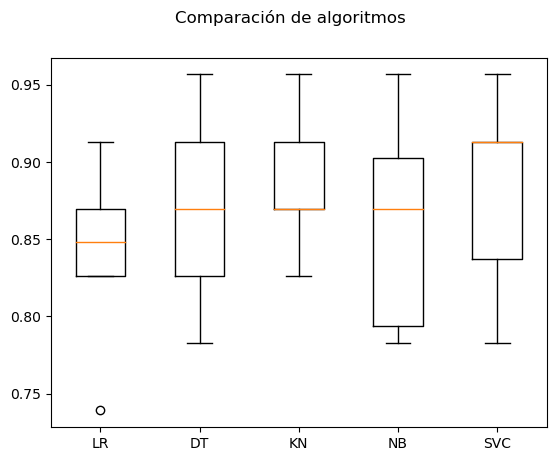

In [17]:
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

In [18]:
clf = KNeighborsClassifier()

In [19]:
clf.fit(X_train_df, y_train)

KNeighborsClassifier()

In [20]:
predicciones = clf.predict(X_test_df)

In [21]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [22]:
print(confusion_matrix(y_test,predicciones))

[[60  6]
 [ 6 27]]


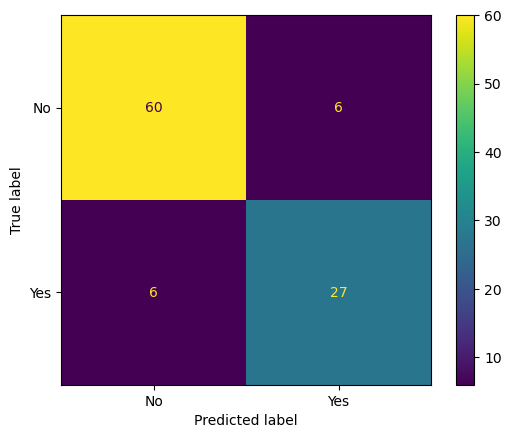

In [23]:
plot_confusion_matrix(clf,X_test_df,y_test)

In [24]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

          No       0.91      0.91      0.91        66
         Yes       0.82      0.82      0.82        33

    accuracy                           0.88        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.88      0.88      0.88        99



In [25]:
import pickle

In [26]:
modelo_clf_mall = 'modelo_clf_mall.pkl'
pickle.dump(clf, open(modelo_clf_mall, 'wb'))

# Fin